## Dataset used: [IRIS-Flower-Dataset.csv](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

# Load and Inspect the data:

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
df = pd.read_csv('IRIS.csv')

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization:

### Pair plot to visualize the relationship between different features.

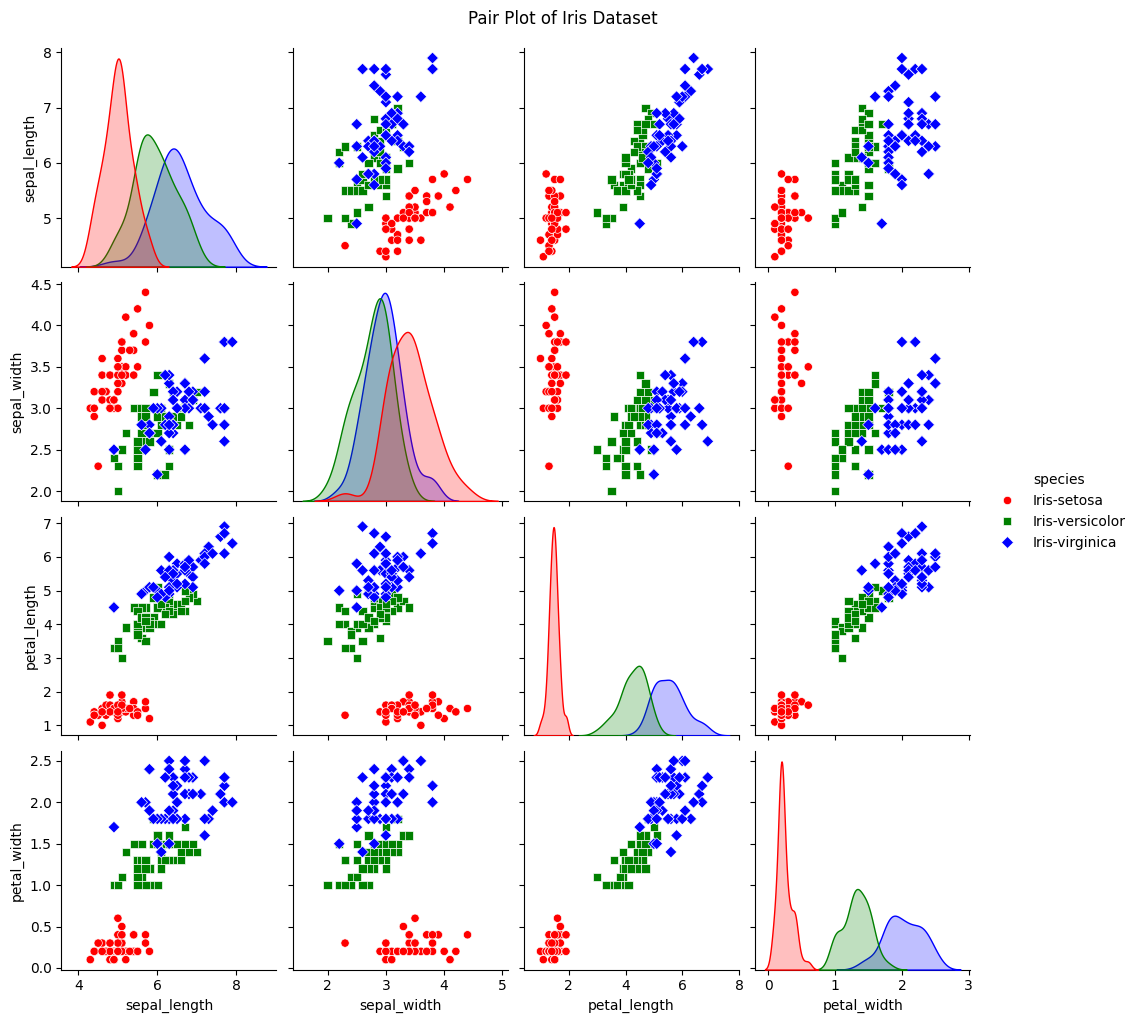

In [11]:
custom_palette = {
    'Iris-setosa': "red",       
    'Iris-versicolor': "green",    
    'Iris-virginica': "blue"       
}

sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette=custom_palette)
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

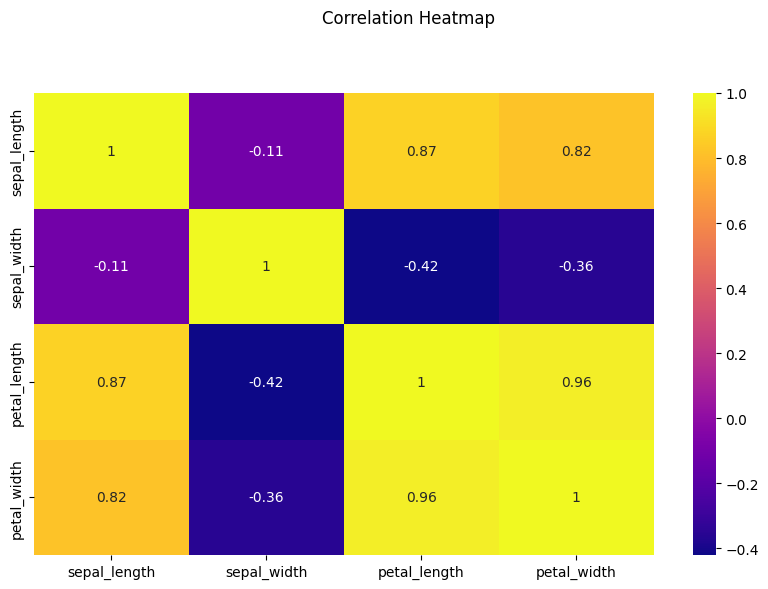

In [12]:
numeric_columns=df.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True,ax=axis,cmap='plasma')
plt.suptitle('Correlation Heatmap', y=1.02)
plt.show()

# Preprocessing:

In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [118]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Convert categorical values into numerical form:

In [22]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [30]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

# Split the Data into Training and Testing Sets:

In [31]:
x = df.drop(columns='species')
y = df['species']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Logistic Regression:

In [158]:
LR=LogisticRegression(max_iter=200, random_state=42)

In [159]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [160]:
LR_accuracy=LR.score(x_test,y_test)*100

In [161]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")

Accuracy by using Logistic Regression: 100.0%


### K Nearest Neighbors Classifier:

In [162]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [163]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [164]:
KNN_accuracy=KNN.score(x_test,y_test)*100

In [165]:
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")

Accuracy by using K Nearest Neighbors Algorithm: 100.0%


### Decision Tree Classifier: 

In [166]:
DT=DecisionTreeClassifier(random_state=42)

In [167]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [168]:
DT_accuracy=DT.score(x_test,y_test)*100

In [169]:
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")

Accuracy by using Decision Tree Classifier: 100.0%


### Random Forest Classifier:

In [154]:
RF=RandomForestClassifier(random_state=42)

In [155]:
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [156]:
RF_accuracy=RF.score(x_test,y_test)*100

In [157]:
print(f"Accuracy by using Random Forest Classifier: {RF_accuracy}%")

Accuracy by using Random Forest Classifier: 100.0%


# Conclusion:

### All four models achieved an accuracy of 100% on the test dataset. This indicates that each model was able to correctly classify all the test instances into their respective Iris species.

- **RandomForest Accuracy**: 100%
- **Logistic Regression Accuracy**: 100%
- **K-Nearest Neighbors Accuracy**: 100%
- **Decision Tree Accuracy**: 100%